# Module 6: PyWeather -- World Weather Analysis

### Imports

In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from config import weather_api_key

### Create a set of random latitude and longitude combinations.

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

### Add the latitudes and longitudes to a list.

In [3]:
coordinates = list(lat_lngs)
coordinates

[(-12.74096349912385, -134.8238923355664),
 (-3.7493711445198983, -99.84508680587044),
 (45.39668299278614, 19.363437595470742),
 (-23.38465274627579, 25.684791797556727),
 (36.31846153784926, 52.94979672477123),
 (83.13491011490572, 90.47733506954631),
 (-8.458512864544488, -85.8303014514676),
 (8.420824936680589, 111.27104922436251),
 (-49.794453624324554, -80.80098991721836),
 (-52.51754904058452, -118.10203506091466),
 (57.30981816536871, -143.18282522440714),
 (-68.46593571170887, 30.946170358208235),
 (-70.70994832471945, -20.950181889974374),
 (-55.80119920965335, 160.30176444448387),
 (-67.41781352109413, 103.40264542890145),
 (-50.22774221751122, 17.49518256011632),
 (-77.0573488323673, -53.41080401345607),
 (0.6424533279263613, -115.8370275469333),
 (-47.49526785127312, -15.409530329410018),
 (64.16660170360805, -135.95738955378135),
 (-41.53071805254817, 65.65867770425774),
 (33.105755960077204, -101.14283793760588),
 (41.34378870753383, -178.43466292223536),
 (60.0223125800

## Identify cities using citipy

In [4]:
# import the citipy module.
from citipy import citipy

# Create a list for holding the cities.
cities=[]

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

657

Starting URL for Weather Map API Call.

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ed4147d80eaec5c0d6da2806288a117


Create an endpoint URL for a city.

In [6]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ed4147d80eaec5c0d6da2806288a117&q=Boston


Make a 'Get' request for the city weather.

In [7]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

Create an endpoint URL for a city.

In [8]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

Get the text of the 'Get' request.

In [9]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":61.03,"feels_like":60.4,"temp_min":55.06,"temp_max":64.24,"pressure":1008,"humidity":76},"visibility":10000,"wind":{"speed":27.63,"deg":230,"gust":37.98},"clouds":{"all":75},"dt":1646623471,"sys":{"type":2,"id":2009921,"country":"US","sunrise":1646565100,"sunset":1646606378},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

Get the JSON text of the 'Get' request.

In [10]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 61.03,
  'feels_like': 60.4,
  'temp_min': 55.06,
  'temp_max': 64.24,
  'pressure': 1008,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 27.63, 'deg': 230, 'gust': 37.98},
 'clouds': {'all': 75},
 'dt': 1646623471,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1646565100,
  'sunset': 1646606378},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City weather not found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 61.03,
  'feels_like': 60.4,
  'temp_min': 55.06,
  'temp_max': 64.24,
  'pressure': 1008,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 27.63, 'deg': 230, 'gust': 37.98},
 'clouds': {'all': 75},
 'dt': 1646623471,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1646565100,
  'sunset': 1646606378},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data['sys']

{'type': 2,
 'id': 2009921,
 'country': 'US',
 'sunrise': 1646565100,
 'sunset': 1646606378}

In [16]:
boston_data["dt"]

1646623471

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 64.24 76 75 27.63


#### Convert Timestamp to Human-legible Date Format

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-03-07 03:24:31'

## Get the City Weather Data

In [19]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [20]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1

    #Create endpoint url for each city.
    city_url = url + "&q=" + city

    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    #Add 1 to the record count.
    record_count += 1

    #Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | bac
Processing Record 4 of Set 1 | lephepe
City not found. Skipping...
Processing Record 5 of Set 1 | sari
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | sechura
Processing Record 8 of Set 1 | phan rang
City not found. Skipping...
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | haines junction
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | mayo
Processing Record 21 of Set 1 | saint-philippe
Processing Recor

In [21]:
len(city_data)

596

In [22]:
#Convert the array of dictionaries to a panda dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.67,78,33,12.41,PF,2022-03-07 03:28:35
1,Puerto Ayora,-0.7393,-90.3518,76.64,84,81,3.78,EC,2022-03-07 03:28:36
2,Bac,45.3919,19.2367,33.93,99,100,4.09,RS,2022-03-07 03:28:36
3,Sari,36.5633,53.0601,47.79,93,100,13.80,IR,2022-03-07 03:28:37
4,Talnakh,69.4865,88.3972,-25.83,96,24,2.39,RU,2022-03-07 03:28:37
5,Sechura,-5.5569,-80.8222,75.07,71,95,4.83,PE,2022-03-07 03:28:38
6,Coihaique,-45.5752,-72.0662,51.75,87,0,2.30,CL,2022-03-07 03:28:39
7,Rikitea,-23.1203,-134.9692,79.45,77,100,17.27,PF,2022-03-07 03:28:39
8,Haines Junction,60.7522,-137.5108,28.35,46,4,8.05,CA,2022-03-07 03:28:39
9,Port Elizabeth,-33.9180,25.5701,73.09,88,0,2.30,ZA,2022-03-07 03:28:40


In [23]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-03-07 03:28:35,-9.8000,-139.0333,78.67,78,33,12.41
1,Puerto Ayora,EC,2022-03-07 03:28:36,-0.7393,-90.3518,76.64,84,81,3.78
2,Bac,RS,2022-03-07 03:28:36,45.3919,19.2367,33.93,99,100,4.09
3,Sari,IR,2022-03-07 03:28:37,36.5633,53.0601,47.79,93,100,13.80
4,Talnakh,RU,2022-03-07 03:28:37,69.4865,88.3972,-25.83,96,24,2.39
5,Sechura,PE,2022-03-07 03:28:38,-5.5569,-80.8222,75.07,71,95,4.83
6,Coihaique,CL,2022-03-07 03:28:39,-45.5752,-72.0662,51.75,87,0,2.30
7,Rikitea,PF,2022-03-07 03:28:39,-23.1203,-134.9692,79.45,77,100,17.27
8,Haines Junction,CA,2022-03-07 03:28:39,60.7522,-137.5108,28.35,46,4,8.05
9,Port Elizabeth,ZA,2022-03-07 03:28:40,-33.9180,25.5701,73.09,88,0,2.30


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1646624638.804609

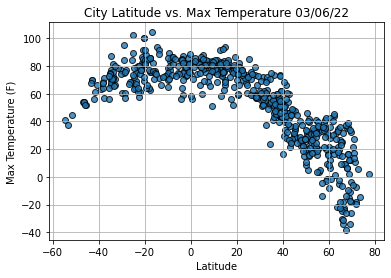

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

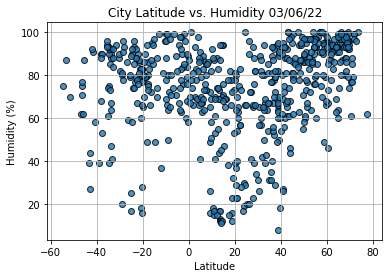

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

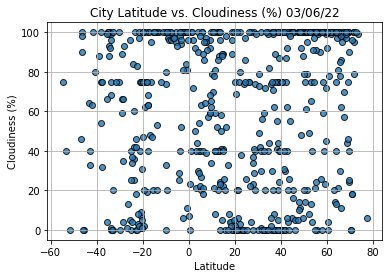

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

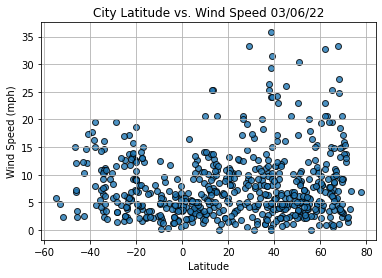

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()